In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,LeaveOneOut
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score,precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV



# Prepare Data

## Load Data

In [82]:
## ------- Load Data from CSV ------##

# Refer to Excel for more details
data_df = pd.read_csv('/Users/ferdinand/REPO_DDLitLab_new/main-project-v-3/Data/final_data.csv', sep=',')

# Rename the first column to 'Stadtteil' for clarity
data_df.rename(columns={"Unnamed: 0": "Stadtteil"} ,inplace=True)

# Set 'Stadtteil' as the index for the DataFrame
data_df.set_index("Stadtteil", inplace=True)


## Variables used

In [83]:
## ------- List of used variables ------##


final_variables = ['Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
'Einwohner: innen je km²',
'Gesamtbetrag Einkünfte Median - [€]',
'market_count',
'farms_count',
'greencrocers_count',
'supermarkets_count',
'biosupermarkets_count',
'Anteil der Sozial-wohnungen an allen Wohnungen',
'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
'Durch-schnittliche Anzahl der Personen je Haushalt',
'all_restaurants_count',
'organic_restaurants_count',
'vegan_restaurants_count',
'art_score',
'distance_rathaus']

data_df = data_df[final_variables]

## Exploratory Data Analysis

In [84]:
## ------- Data Summary ------##

data_df.describe()

Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung  \
count                                          99.000000                          
mean                                           17.335354                          
std                                             3.698050                          
min                                             5.600000                          
25%                                            15.350000                          
50%                                            17.700000                          
75%                                            19.400000                          
max                                            33.600000                          

       Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung  \
count                                          99.000000                          
mean                                           17.708081                          
std                                             5.263829                          
min                                             3.200000                          
25%                                            14.250000                          
50%                                            18.200000                          
75%                                            20.850000                          
max                                            31.500000                          

       Einwohner: innen je km²  Gesamtbetrag Einkünfte Median - [€]  \
count                99.000000                            99.000000   
mean               4446.888889                         27084.161616   
std                4374.242047                          8388.195539   
min                  42.000000                          8057.000000   
25%                1419.000000                         22868.000000   
50%                3032.000000                         26568.000000   
75%                6333.500000                         30242.500000   
max               18897.000000                         57913.000000   

       market_count  farms_count  greencrocers_count  supermarkets_count  \
count     99.000000    99.000000           99.000000           99.000000   
mean       0.747475     0.030303            0.575758            3.969697   
std        0.861222     0.223814            1.125683            4.319993   
min        0.000000     0.000000            0.000000            0.000000   
25%        0.000000     0.000000            0.000000            1.000000   
50%        1.000000     0.000000            0.000000            3.000000   
75%        1.000000     0.000000            1.000000            5.000000   
max        4.000000     2.000000            8.000000           21.000000   

       biosupermarkets_count  Anteil der Sozial-wohnungen an allen Wohnungen  \
count              99.000000                                       99.000000   
mean                0.353535                                        7.685859   
std                 0.659516                                       10.600337   
min                 0.000000                                        0.000000   
25%                 0.000000                                        1.300000   
50%                 0.000000                                        4.400000   
75%                 1.000000                                       10.200000   
max                 3.000000                                       77.100000   

       Durch-schnittliche Wohnfläche je Einwohner:in in m²  \
count                                          99.000000     
mean                                           40.626263     
std                                             8.406868     
min                                            10.400000     
25%                                            35.750000     
50%                                            39.200000     
75%                            

/var/folders/lj/q1ndb2493275c2y0vzyplnk00000gn/T/ipykernel_4145/1855402531.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha="right")


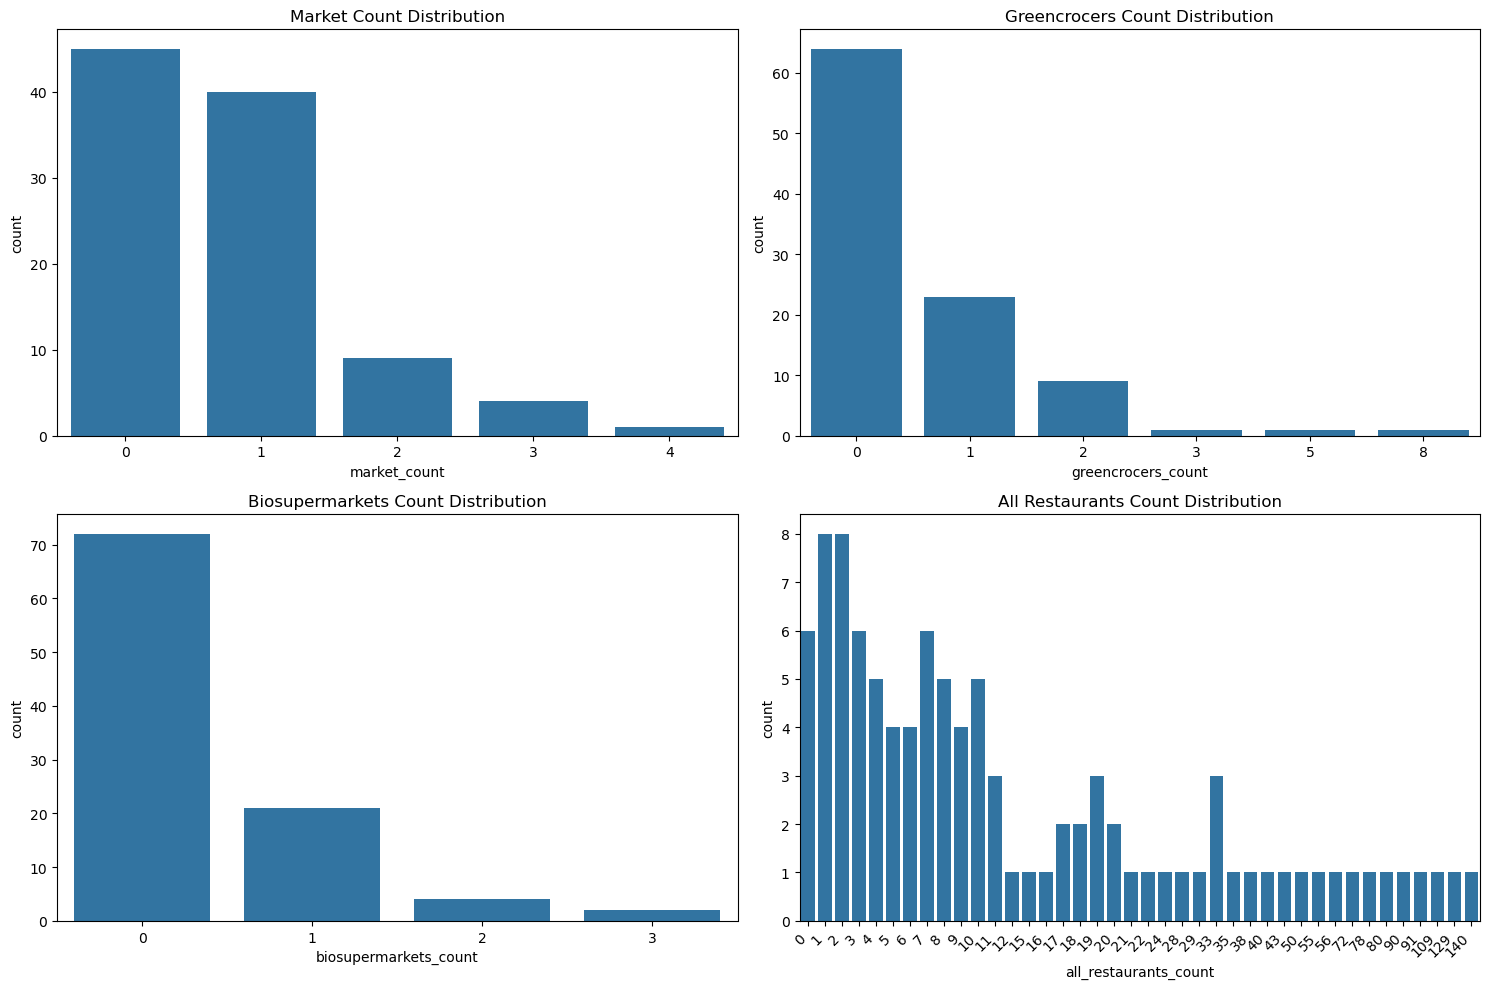

In [85]:
## ------- Plot Count Data ------##

fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

# Plot the distribution of market counts
sns.countplot(x="market_count", data=data_df, ax=axs[0, 0])
axs[0, 0].set_title('Market Count Distribution')

# Plot the distribution of greencrocers counts
sns.countplot(x="greencrocers_count", data=data_df, ax=axs[0, 1])
axs[0, 1].set_title('Greencrocers Count Distribution')

# Plot the distribution of biosupermarkets counts
sns.countplot(x="biosupermarkets_count", data=data_df, ax=axs[1, 0])
axs[1, 0].set_title('Biosupermarkets Count Distribution')

# Plot the distribution of all restaurants counts
sns.countplot(x="all_restaurants_count", data=data_df, ax=axs[1, 1])
axs[1, 1].set_title('All Restaurants Count Distribution')

# Rotate x-axis labels for better readability
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()




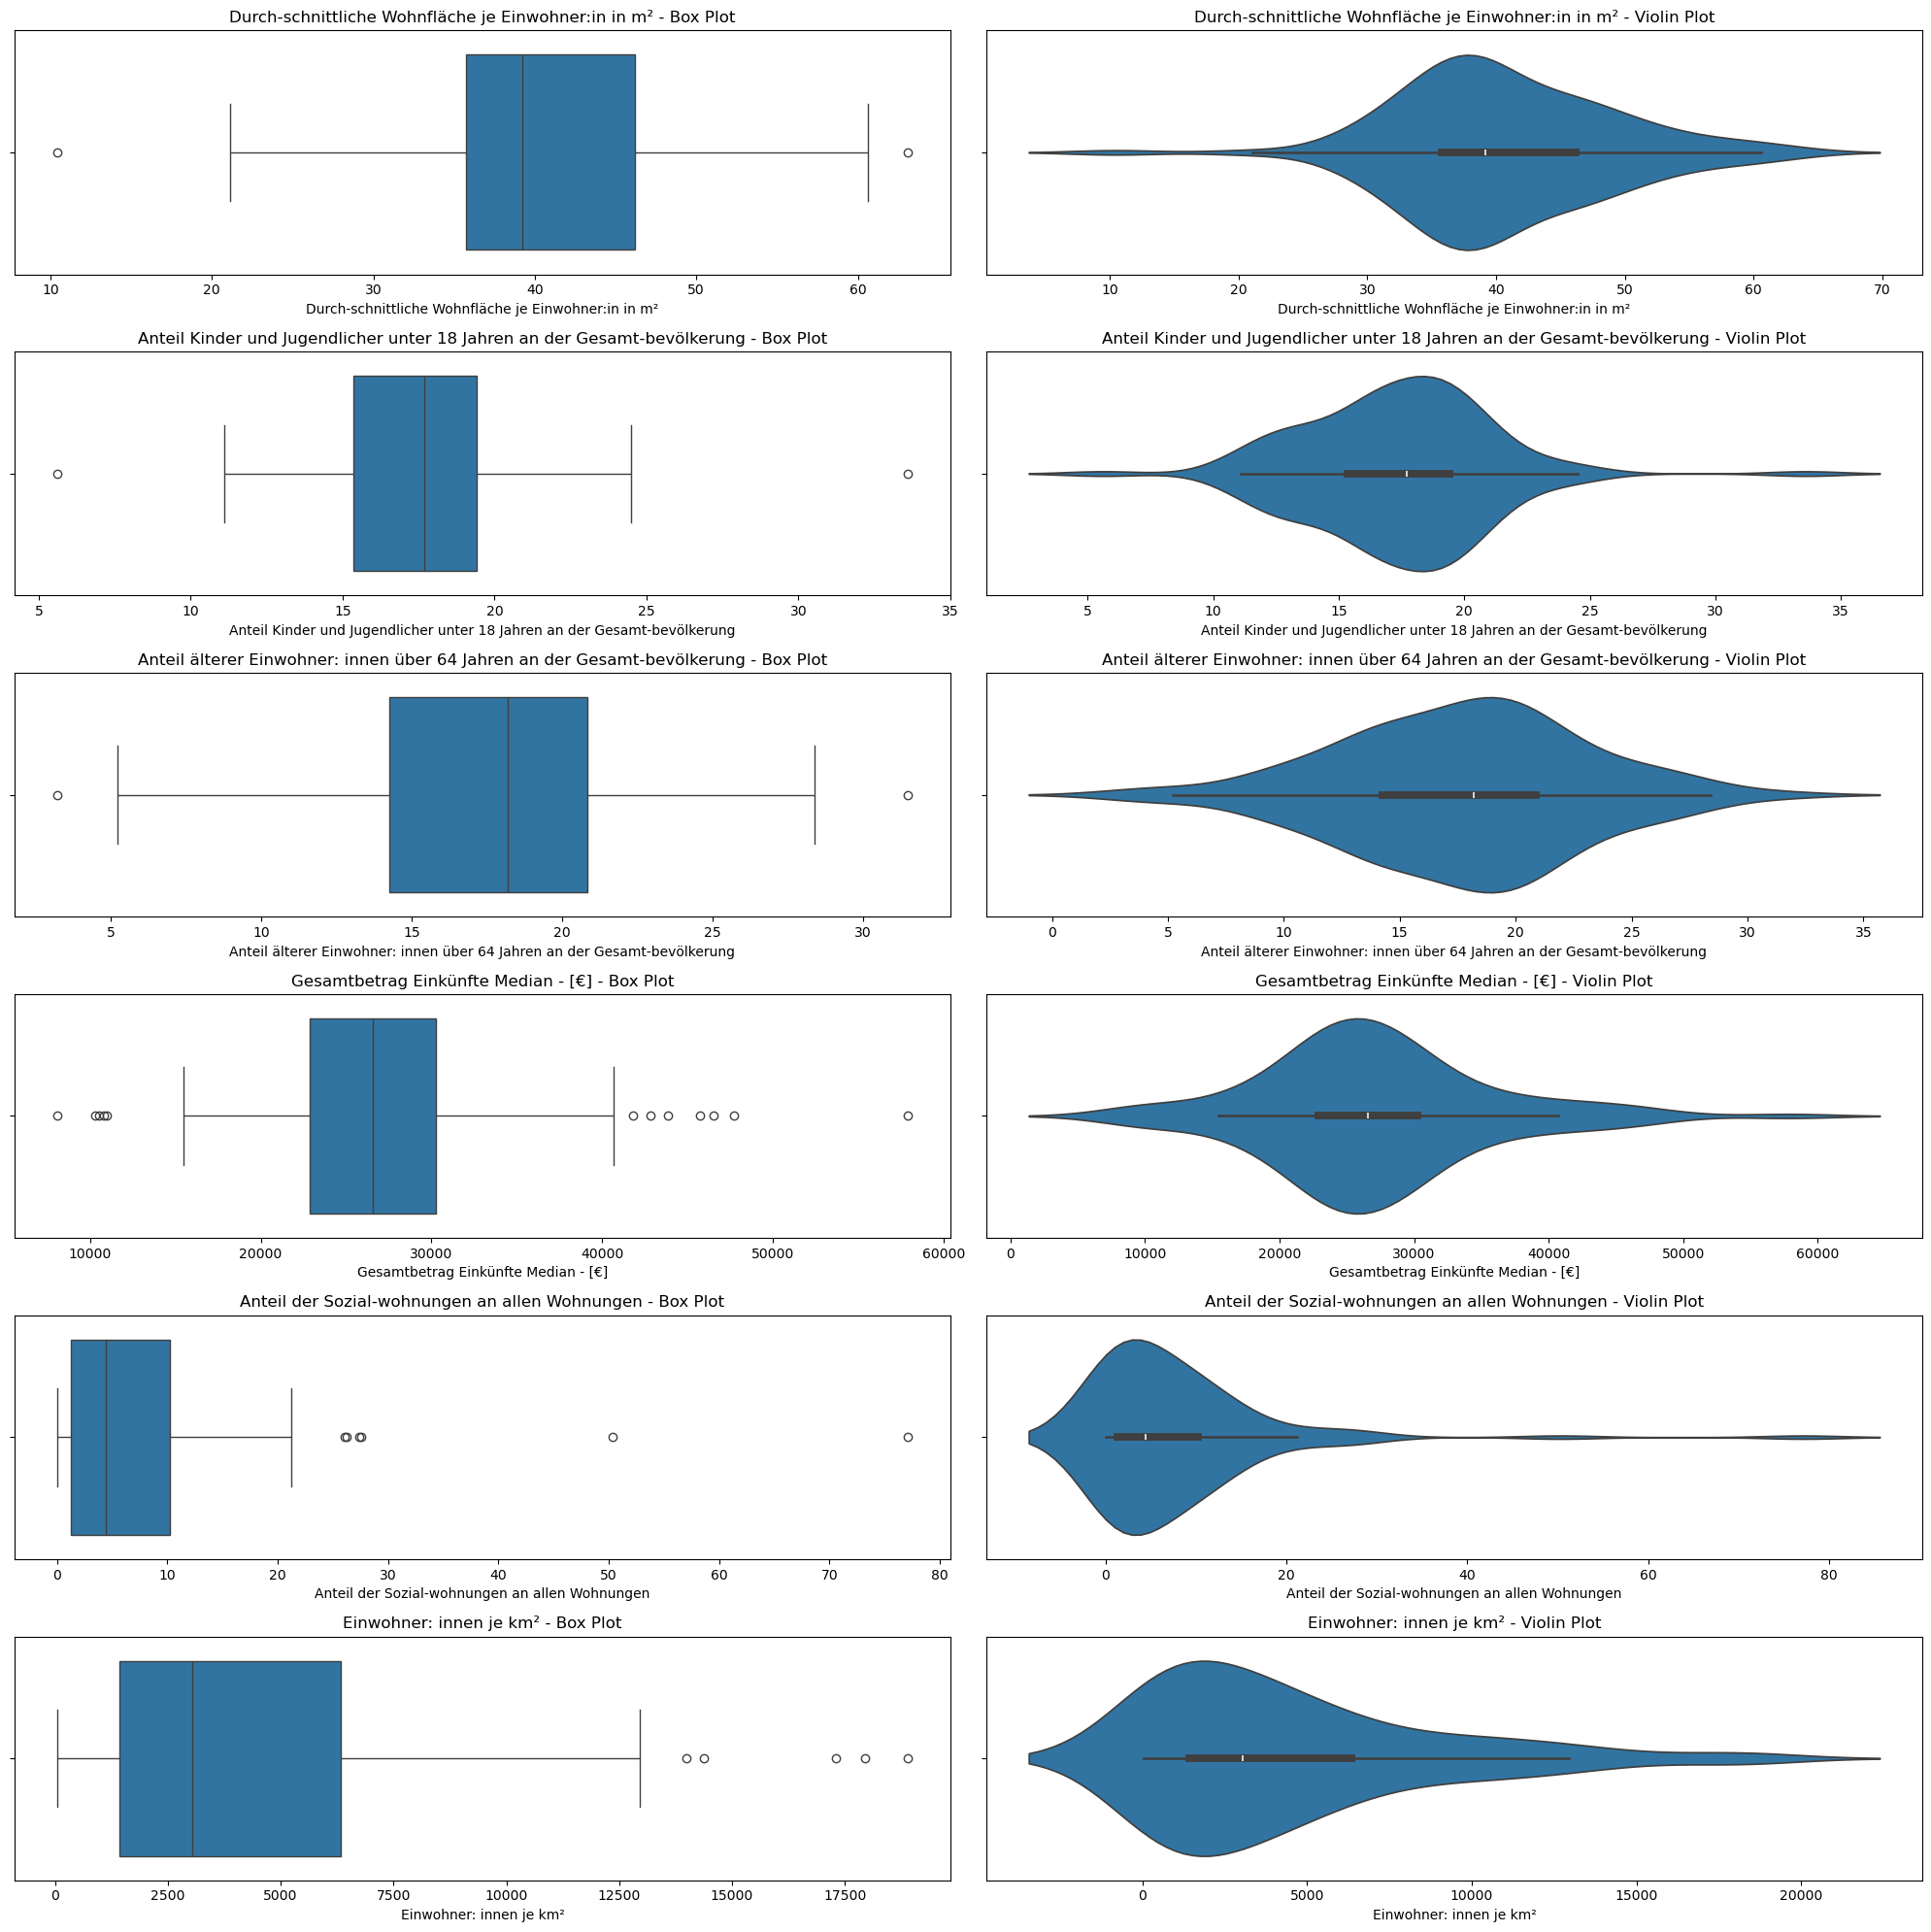

In [86]:
## -------  Box Plots and Violin Plots of some variables ------##

fig, axs = plt.subplots(6, 2, figsize=(20, 20))  

# List of variables to plot
variables = [
    'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
    'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
    'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
    'Gesamtbetrag Einkünfte Median - [€]',
    'Anteil der Sozial-wohnungen an allen Wohnungen',
    'Einwohner: innen je km²'
]

# Iterate over variables and create plots
for i, var in enumerate(variables):
    # Plot the box plot for each variable
    sns.boxplot(x=data_df[var], ax=axs[i, 0])
    axs[i, 0].set_title(f'{var} - Box Plot')
    
    # Plot the violin plot for each variable
    sns.violinplot(x=data_df[var], ax=axs[i, 1])
    axs[i, 1].set_title(f'{var} - Violin Plot')

plt.tight_layout()
plt.show()



# Predictions

## Artificial Score 

In [87]:
## ------- Split Data into Predicted and Predictor Variables ------##

# Predict art_score from all other variables

# y: dependent/predicted variable
y = data_df[["art_score"]]

# X: independent/predictor variables
X = data_df.drop(['art_score','market_count', 'farms_count', 'greencrocers_count', 
                  'supermarkets_count', 'biosupermarkets_count', 'all_restaurants_count'], axis=1)

# Display the predictor variable column names
X.columns

Index(['Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
       'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
       'Einwohner: innen je km²', 'Gesamtbetrag Einkünfte Median - [€]',
       'Anteil der Sozial-wohnungen an allen Wohnungen',
       'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
       'Durch-schnittliche Anzahl der Personen je Haushalt',
       'organic_restaurants_count', 'vegan_restaurants_count',
       'distance_rathaus'],
      dtype='object')

### Linear Regression 

In [88]:
##  -------------------  Pipeline   ------------------------ ##

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline - combine models 
pipeline = Pipeline([('scaler', StandardScaler()), ('lrm', LinearRegression())])

pipeline.fit(X_train, y_train)

# Predictions for test set
y_pred_test = pipeline.predict(X_test)

# Predictions for train set
y_pred_train = pipeline.predict(X_train)

# Scoring for test set
r2_score_test = pipeline.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Scoring for train set
r2_score_train = pipeline.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print the evaluation metrics for both train and test sets
print("Test Data Evaluation:")
print("R² Score:", r2_score_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

print("\nTrain Data Evaluation:")
print("R² Score:", r2_score_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

Test Data Evaluation:
R² Score: 0.30021940991697527
Mean Absolute Error (MAE): 0.781516808506685
Mean Squared Error (MSE): 0.9669721122008438
Root Mean Squared Error (RMSE): 0.9833474015834098

Train Data Evaluation:
R² Score: 0.33593668044046465
Mean Absolute Error (MAE): 0.9557747626835926
Mean Squared Error (MSE): 1.7632125239212189
Root Mean Squared Error (RMSE): 1.327860129652675


### Decision Tree Regression 

In [89]:
##  -------------------  Pipeline   ------------------------ ##

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline - combine models 
pipeline = Pipeline([('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

pipeline.fit(X_train, y_train)

# Predictions for test set
y_pred_test = pipeline.predict(X_test)

# Predictions for train set
y_pred_train = pipeline.predict(X_train)

# Scoring for test set
r2_score_test = pipeline.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Scoring for train set
r2_score_train = pipeline.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print the evaluation metrics for both train and test sets
print("Test Data Evaluation:")
print("R² Score:", r2_score_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

print("\nTrain Data Evaluation:")
print("R² Score:", r2_score_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)




Test Data Evaluation:
R² Score: 0.02234687006897862
Mean Absolute Error (MAE): 0.9327380952380953
Mean Squared Error (MSE): 1.3509424603174605
Root Mean Squared Error (RMSE): 1.1623005034488545

Train Data Evaluation:
R² Score: 1.0
Mean Absolute Error (MAE): 2.6350230014837577e-19
Mean Squared Error (MSE): 1.8284145041650974e-36
Root Mean Squared Error (RMSE): 1.35218878273897e-18


### MLP Regression

In [90]:
##  -------------------  Pipeline   ------------------------ ##

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline - combine models 
pipeline = Pipeline([('scaler', StandardScaler()), ('MLP', MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=10000, random_state=42, alpha=0.01, learning_rate_init=0.1 ))])

pipeline.fit(X_train, y_train)

# Predictions for test set
y_pred_test = pipeline.predict(X_test)

# Predictions for train set
y_pred_train = pipeline.predict(X_train)

# Scoring for test set
r2_score_test = pipeline.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Scoring for train set
r2_score_train = pipeline.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print the evaluation metrics for both train and test sets
print("Test Data Evaluation:")
print("R² Score:", r2_score_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

print("\nTrain Data Evaluation:")
print("R² Score:", r2_score_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())

Test Data Evaluation:
R² Score: -1.051608149350848
Mean Absolute Error (MAE): 1.2748032650871275
Mean Squared Error (MSE): 2.8349569760871507
Root Mean Squared Error (RMSE): 1.683733047750489

Train Data Evaluation:
R² Score: -0.6070944215544023
Mean Absolute Error (MAE): 1.3368572201693807
Mean Squared Error (MSE): 4.267136774077767
Root Mean Squared Error (RMSE): 2.0657049097288236


/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validated R² scores: [-1.32056646 -1.22582622 -0.95778379 -0.36476    -0.12641462]
Mean R² score: -0.7990702178814985


/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Market Count

In [91]:
##  -------------------  Market count - Split in predicted/predictor   ------------------------ ##


# y - dependent/predicted variable
# X - "independent"/predictor variable 

# still all columns that include NaN are dropped
# Additional coulmns dropped 


y = data_df[["market_count"]]
X = data_df.drop(['Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
       'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung','market_count', 'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
       'Durch-schnittliche Anzahl der Personen je Haushalt', 'art_score', 'farms_count'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.columns


Index(['Einwohner: innen je km²', 'Gesamtbetrag Einkünfte Median - [€]',
       'greencrocers_count', 'supermarkets_count', 'biosupermarkets_count',
       'Anteil der Sozial-wohnungen an allen Wohnungen',
       'all_restaurants_count', 'organic_restaurants_count',
       'vegan_restaurants_count', 'distance_rathaus'],
      dtype='object')

### Logistic Regression

In [92]:
##  -------------------  Fit Model and Score  ------------------------ ##

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LogM',LogisticRegression())
])

pipeline.fit(X_train, y_train)


# Make predictions on the training set
y_pred_train = pipeline.predict(X_train)

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate accuracy for the training set
accuracy_train = pipeline.score(X_train, y_train)
print("Training Set Accuracy:", accuracy_train)

# Calculate accuracy for the test set
accuracy_test = pipeline.score(X_test, y_test)
print("Test Set Accuracy:", accuracy_test)

# Generate the classification report for the training set
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Generate the classification report for the test set
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Getting model parameters
params = pipeline.get_params()
print("\nModel Parameters:", params)



Training Set Accuracy: 0.8227848101265823
Test Set Accuracy: 0.55

Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.77      0.82      0.79        33
           2       1.00      0.80      0.89         5
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         1

    accuracy                           0.82        79
   macro avg       0.92      0.75      0.79        79
weighted avg       0.83      0.82      0.82        79


Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.40      0.57      0.47         7
           2       0.00      0.00      0.00         4

    accuracy                           0.55        20
   macro avg       0.37      0.45      0.40        20
weighted avg       0.45      0.55      0.50    

/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/m

### Decision Tree Classification

In [93]:
##  -------------------  Fit Model and Score  ------------------------ ##

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('DTC',DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = pipeline.predict(X_train)

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate accuracy for the training set
accuracy_train = pipeline.score(X_train, y_train)
print("Training Set Accuracy:", accuracy_train)

# Calculate accuracy for the test set
accuracy_test = pipeline.score(X_test, y_test)
print("Test Set Accuracy:", accuracy_test)

# Generate the classification report for the training set
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Generate the classification report for the test set
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Getting model parameters
params = pipeline.get_params()
print("\nModel Parameters:", params)


Training Set Accuracy: 1.0
Test Set Accuracy: 0.5

Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79


Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.43      0.43      0.43         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         0

    accuracy                           0.50        20
   macro avg       0.30      0.30      0.30        20
weighted 

/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLP Classification

In [94]:
##  -------------------  Fit Model and Score  ------------------------ ##

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the pipeline with MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1000, random_state=42, alpha=0.1, learning_rate_init=0.1))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train.values.ravel())

# Making predictions on both the training and test sets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculating and printing accuracy for both sets
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Generating and printing classification reports for both sets
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Getting and printing the pipeline's parameters
params = pipeline.get_params()
print("\nModel Parameters:", params)


Training Set Accuracy: 1.0
Test Set Accuracy: 0.5

Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79


Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.42      0.71      0.53         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         0

    accuracy                           0.50        20
   macro avg       0.28      0.32      0.29        20
weighted 

/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdinand/anacond

## Market Yes/No

In [95]:
##  -------------------  Market yes/no - Split in predicted/predictor   ------------------------ ##


# Add a column that contains only 1/0 for market yes and no

data_df["market_yes_no"] = data_df["market_count"].apply(lambda x: 1 if x > 0 else 0)

# y - dependent/predicted variable
# X - "independent"/predictor variable 

# still all columns that include NaN are dropped
# Additional coulmns dropped 


y = data_df[["market_yes_no"]]
X = data_df.drop(['Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
       'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung','market_count', 'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
       'Durch-schnittliche Anzahl der Personen je Haushalt', 'art_score', 'farms_count'], axis=1)

print(X.columns)


Index(['Einwohner: innen je km²', 'Gesamtbetrag Einkünfte Median - [€]',
       'greencrocers_count', 'supermarkets_count', 'biosupermarkets_count',
       'Anteil der Sozial-wohnungen an allen Wohnungen',
       'all_restaurants_count', 'organic_restaurants_count',
       'vegan_restaurants_count', 'distance_rathaus', 'market_yes_no'],
      dtype='object')


### Logistic Regression

In [96]:
##  -------------------  Fit Model and Score  ------------------------ ##

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LogM',LogisticRegression())
])

pipeline.fit(X_train, y_train)


# Make predictions on the training set
y_pred_train = pipeline.predict(X_train)

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate accuracy for the training set
accuracy_train = pipeline.score(X_train, y_train)
print("Training Set Accuracy:", accuracy_train)

# Calculate accuracy for the test set
accuracy_test = pipeline.score(X_test, y_test)
print("Test Set Accuracy:", accuracy_test)

# Generate the classification report for the training set
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Generate the classification report for the test set
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))




Training Set Accuracy: 1.0
Test Set Accuracy: 1.0

Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        43

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79


Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/Users/ferdinand/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Tree Classification

In [97]:
##  -------------------  Fit Model and Score  ------------------------ ##

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('DTC', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = pipeline.predict(X_train)

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate accuracy for the training set
accuracy_train = pipeline.score(X_train, y_train)
print("Training Set Accuracy:", accuracy_train)

# Calculate accuracy for the test set
accuracy_test = pipeline.score(X_test, y_test)
print("Test Set Accuracy:", accuracy_test)

# Generate the classification report for the training set
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Generate the classification report for the test set
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Getting model parameters
params = pipeline.get_params()
print("\nModel Parameters:", params)


Training Set Accuracy: 1.0
Test Set Accuracy: 1.0

Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        43

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79


Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Model Parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('DTC', DecisionTreeClassifier())], 'verbose': False, 'scaler': StandardScaler(), 'DTC': DecisionTreeClassifier(), 'scaler__copy': True, 'scaler__wi

### MLP Classification

In [98]:
##  -------------------  Fit Model and Score  ------------------------ ##


# Setting up the pipeline with MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling is especially important for neural networks
    ('MLP', MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=1000, random_state=42, alpha=0.001, learning_rate_init=0.1))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train.values.ravel())

# Making predictions on both the training and test sets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculating and printing accuracy for both sets
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Generating and printing classification reports for both sets
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Getting and printing the pipeline's parameters
params = pipeline.get_params()
print("\nModel Parameters:", params)

Training Set Accuracy: 1.0
Test Set Accuracy: 1.0

Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        43

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79


Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Model Parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('MLP', MLPClassifier(alpha=0.001, hidden_layer_sizes=100, learning_rate_init=0.1,
              max_iter=1000, random_state=42))], 'verbose': False